### K-Mean Clustering

In [224]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

## K-Means Clustering 

### Plotting

### Lab Task1: Assess the flood effects insindh using clusterring

-Load two images (before flood, and after flood)

 -Apply Clustering for both images
    
 -Creat masks for both images

 -count the number of pixels of water bodies in both images
    
 -Calculate the differnce

 -visualize the difference

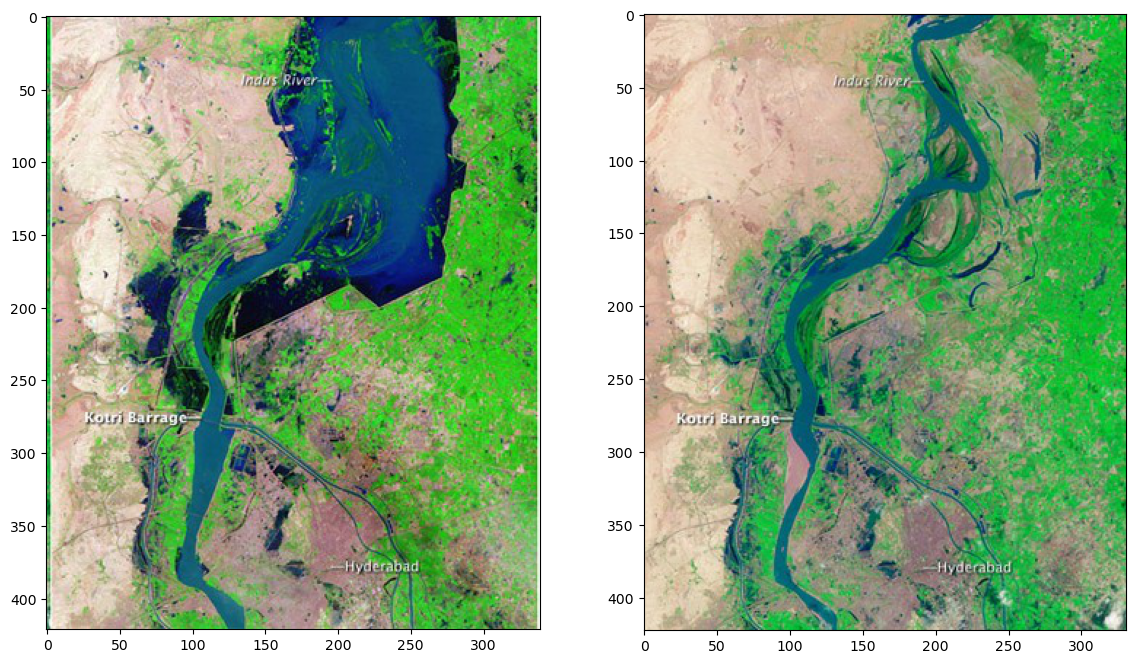

In [235]:
image_path1 = 'before_flood.jpg'
image_path2 = 'after_flood.jpg'
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)
image1 = Image.open(image_path1)

plt.figure(figsize=(14,8))
plt.subplot(121)

plt.imshow(image1 , cmap = 'gray');

plt.subplot(122)
plt.imshow(image2 , cmap = 'gray');

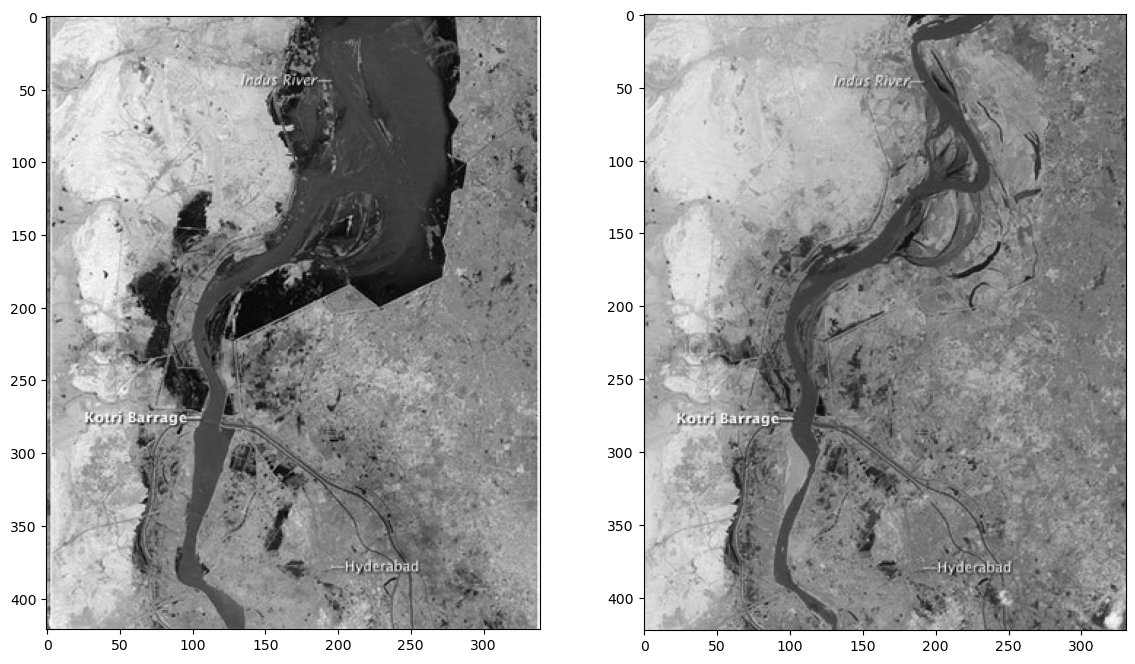

In [236]:

plt.figure(figsize=(14,8))
plt.subplot(121)

image1 = Image.open(image_path1).convert('L')
plt.imshow(image1 , cmap='gray');
plt.subplot(122)
image2 = Image.open(image_path2).convert('L')
plt.imshow(image2 , cmap = 'gray');

In [237]:
# Get the dimensions of each image
width1, height1 = image1.size
width2, height2 = image2.size

# Determine the image to match the size with
target_width, target_height = width1, height1  # Choose image1 as the target size

# Resize image2 to match the target size
resized_image2 = image2.resize((target_width, target_height))

print(image1.size )
print(resized_image2.size)

(339, 421)
(339, 421)


In [238]:
# Convert PIL image to numpy array 
image1_np = np.array(image1)
image1_1d = image1_np.reshape(-1 , 1)

image1_np.shape , image1_1d.shape


((421, 339), (142719, 1))

In [239]:
#image2_np = np.array(image2)
image2_np = np.array(resized_image2)
image2_1d = image2_np.reshape(-1 ,1)

image2_np.shape , image2_1d.shape

((421, 339), (142719, 1))

In [240]:
n=5
kmeans = KMeans(n_clusters=n)
cluster_assignments1 = kmeans.fit_predict(image1_1d)
cluster_assignments2 = kmeans.fit_predict(image2_1d)

C:\Users\arfan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arfan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [241]:
cluster_assignments1.shape  , cluster_assignments2.shape

((142719,), (142719,))

In [242]:
# Reshape the cluster assignments back to the image shape
clustered_image1 =cluster_assignments1.reshape(image1_np.shape)
clustered_image2 =cluster_assignments2.reshape(image2_np.shape)

In [243]:
clustered_image1.shape,  clustered_image2.shape

((421, 339), (421, 339))

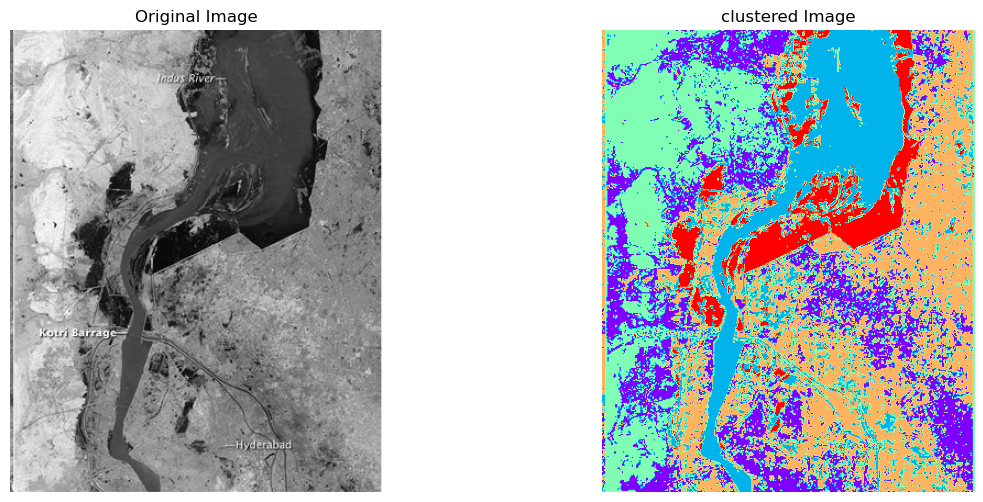

In [244]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(image1_np , cmap='gray')
plt.title('Original Image')
plt.axis('off');

plt.subplot(122)
plt.imshow(clustered_image1 , cmap = 'rainbow')
plt.title('clustered Image')
plt.axis('off')
plt.tight_layout
plt.show()

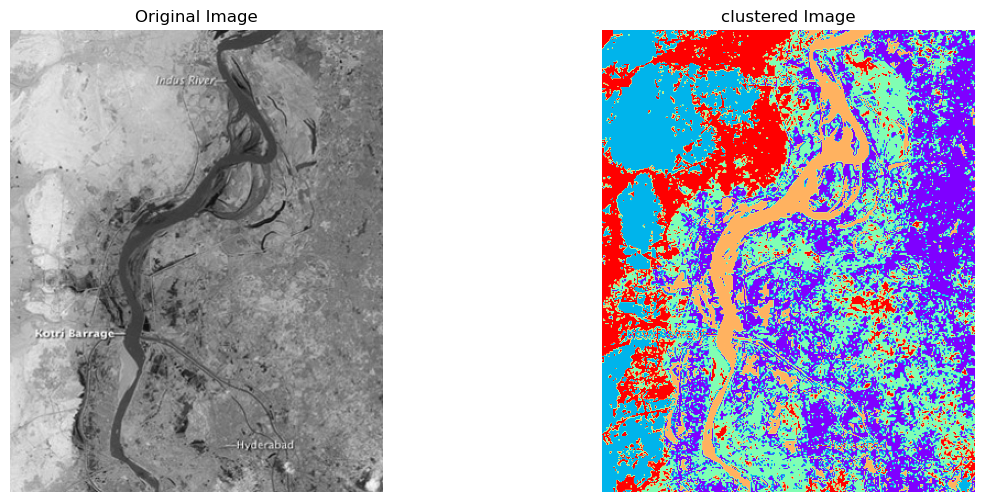

In [245]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(image2_np , cmap='gray')
plt.title('Original Image')
plt.axis('off');

plt.subplot(122)
plt.imshow(clustered_image2 , cmap = 'rainbow')
plt.title('clustered Image')
plt.axis('off')

plt.tight_layout
plt.show()

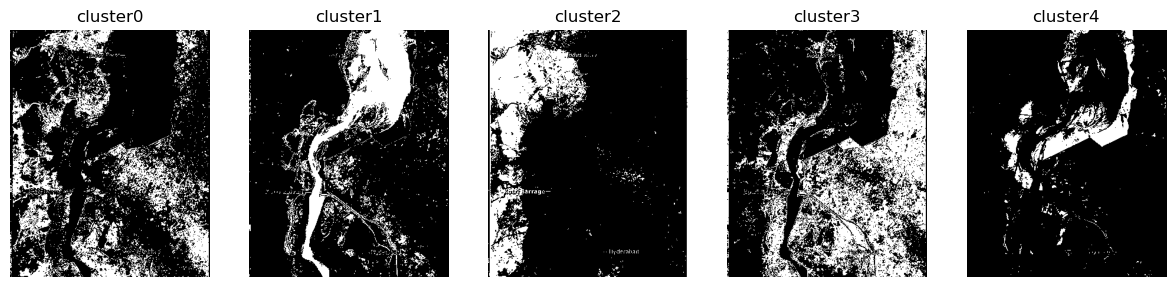

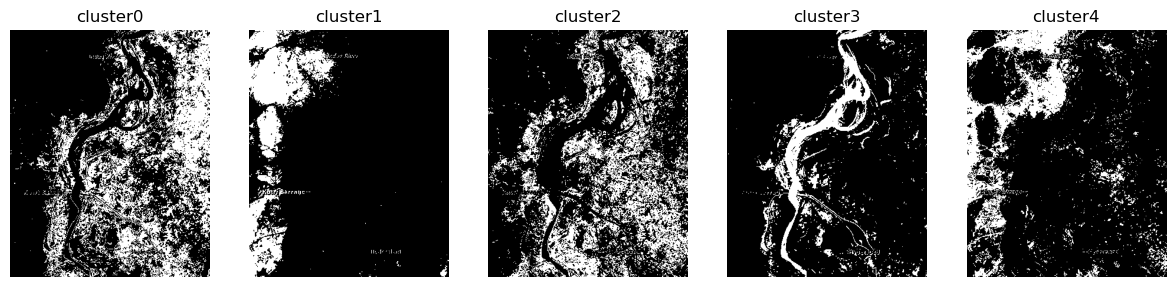

In [246]:
masks_1 = []
for cluster_id in range(n):
    cluster_mask1 = (cluster_assignments1==cluster_id).reshape(image1_np.shape)
    masks_1.append(cluster_mask1)
    clustered_image1.shape
    
plt.figure(figsize=(18,12))
for i in range(n):
    plt.subplot(1 , n+1 , i+2)
    plt.imshow(masks_1[i] , cmap ='gray')
    plt.title(f'cluster{i}')
    plt.axis('off')

   ############################### MASK FOR 2ND IMAGE ###################################### 
    masks_2 = []
for cluster_id in range(n):
    cluster_mask2 = (cluster_assignments2==cluster_id).reshape(image2_np.shape)
    masks_2.append(cluster_mask2)
    clustered_image2.shape
    
plt.figure(figsize=(18,12))
for i in range(n):
    plt.subplot(1 , n+1 , i+2)
    plt.imshow(masks_2[i] , cmap ='gray')
    plt.title(f'cluster{i}')
    plt.axis('off')

In [247]:
after_flood=np.sum(masks_1[1]==1)
after_flood

26513

In [248]:
before_flood= np.sum(masks_2[1]==1)
before_flood 

19713

In [249]:
difference =after_flood - before_flood

In [250]:
difference

6800

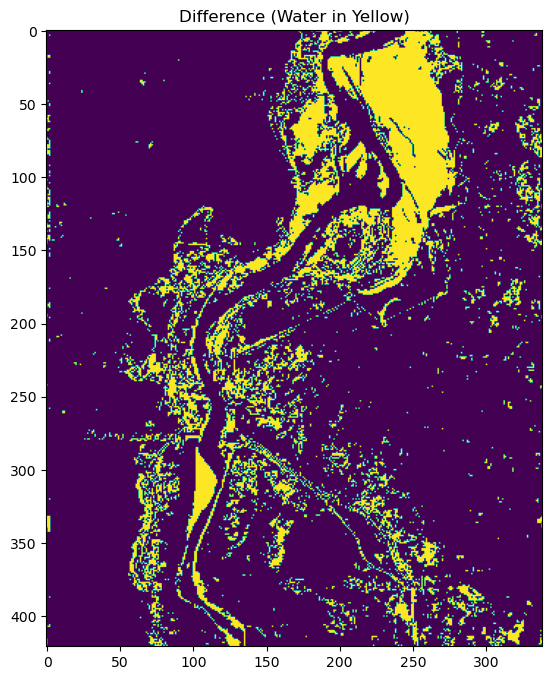

In [251]:
plt.figure(figsize=(15,8))
plt.imshow(masks_1[1] ^  masks_2[3]);
#plt.imshow(masks_2[3] ^ masks_1[1]);
plt.title('Difference (Water in Yellow)');